In [697]:
import pandas as pd
import numpy as np
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import seaborn as sns

In [698]:
# 1
df = pd.read_excel('kardiologija_hospitalizacija 2024-06-28.xlsx')
df.head(6)

,PatientID,dmVisitdtYr,dmBirthdtYr,dmGender,dmHeight,dmWeight,dmBmi,dmHF,dmBpm,dmBp1,...,dcQrsD,dcQt,dcLbbb,dcLvh2,dcBaz,dcFri,dcCol,dcHb,dcGl,dcCre
0,952,2012.0,1941.0,Male,179.0,90.0,28.1,"Yes, with previous hospitalisation",85.0,150.0,...,140.0,372.0,Yes,Yes,429.55,409.44,NaN,145.0,NaN,73.0
1,953,2012.0,1939.0,Male,173.0,90.0,30.1,"Yes, with previous hospitalisation",69.0,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1650,2012.0,1933.0,Male,175.0,73.0,23.8,No,87.0,120.0,...,90.0,282.0,No,No,333.67,315.47,NaN,NaN,NaN,NaN
3,1687,2011.0,1949.0,Male,NaN,NaN,NaN,"Yes, with previous hospitalisation",NaN,130.0,...,100.0,250.0,No,Yes,268.10,261.92,NaN,NaN,NaN,NaN
4,2025,2011.0,1954.0,Male,161.0,76.0,29.3,"Yes, without previous hospitalisation",60.0,140.0,...,160.0,250.0,No,Yes,270.03,263.18,3.3,107.0,5.6,220.0
5,2109,2011.0,1932.0,Male,171.0,69.0,23.6,"Yes, without previous hospitalisation",150.0,110.0,...,80.0,320.0,No,No,505.96,434.31,NaN,133.0,8.9,104.0


In [699]:
df.shape

(651, 59)

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PatientID     651 non-null    int64  
 1   dmVisitdtYr   642 non-null    float64
 2   dmBirthdtYr   641 non-null    float64
 3   dmGender      640 non-null    object 
 4   dmHeight      636 non-null    float64
 5   dmWeight      636 non-null    float64
 6   dmBmi         636 non-null    float64
 7   dmHF          640 non-null    object 
 8   dmBpm         640 non-null    float64
 9   dmBp1         641 non-null    float64
 10  dmBp2         641 non-null    float64
 11  dmEtio        641 non-null    object 
 12  dmSmoking     636 non-null    object 
 13  dmDiab        640 non-null    object 
 14  dmDiabd       248 non-null    object 
 15  dmAlc         637 non-null    object 
 16  dmPhya        452 non-null    object 
 17  dmHT          640 non-null    object 
 18  hsAdm         639 non-null    

In [701]:
# dropping duplicate column and remnaming ' '  column
df=df.drop(columns=['dcNyha'])

df.rename(columns={' ': 'dcNyha'}, inplace=True)

#df=df.drop(columns=[' '])


In [702]:
# 2
# replacing null values of years columns

visitdtYrMode =  df['dmVisitdtYr'].mode().astype(int)[0]
birthdtYrMode =  df['dmBirthdtYr'].mode().astype(int)[0]

df['dmVisitdtYr'].fillna(visitdtYrMode, inplace=True)
df['dmBirthdtYr'].fillna(birthdtYrMode, inplace=True)

In [703]:
# maybe not needed
df['dmVisitdtYr'] = df['dmVisitdtYr'].astype(int)
df['dmBirthdtYr'] = df['dmBirthdtYr'].astype(int)

In [704]:
df[['dmVisitdtYr','dmBirthdtYr']].head()

,dmVisitdtYr,dmBirthdtYr
0,2012,1941
1,2012,1939
2,2012,1933
3,2011,1949
4,2011,1954


In [705]:
df['hsGl'].unique()

array(['9.7', '13.2', '1.75', nan, '5.3', '21.0', '5.5', '7.8', '3.8',
       '12.0', '4.1', '7.3', '4.5', '8.8', '5.2', '8.6', '6.2', '21.1',
       '6.4', '8.0', '5.9', '7.9', '4.9', '6.5', '7.5', '5.0', '4.4',
       '5.8', '5.4', '6.3', '5.6', '16.0', '7.6', '7.2', '5.7', '6.7',
       '5.1', '9.4', '9.3', '6.8', '7.7', '4.8', '9.5', '10.4', '4.6',
       '10.5', '23.9', '10.2', '8.4', '10.3', '9.6', '6.0', '14.4',
       '10.7', '7.1', '11.5', '7.0', '13.9', '8.3', '17.2', '9.8', '12.6',
       '11.2', 10, '9.0', '6.9', '20.3', '6.6', '8.2', 12, '20.8', 24,
       '8.9', 6, 9, 5, '19.8', '8.7', '14.3', '6.1', 8, '11.1', '17.5',
       '8.5', '11.6', '17.4', '19.4', '10.1', '7.4', '13.8', '4.7',
       '11.0', '14.6', 16, '3.9', 7, '3.1', '13.3', '13.5', '11.3',
       '16.8', '4.0', '14.8', '15.8', '9.2', '14.2', 11, 15, 19, '12.7',
       '21.6', 25, '18.1', '12.5', '11.9', '5.40', '8.40', '8.1', '11.8',
       '14.60', '21.4', 13, '11.4', '11.7', '14.5', '18.8', '20.7',
       '

In [706]:
# cleanign hsGl  column and conveting it to numerical column
df['hsGl'] = df['hsGl'].replace({datetime.datetime(2017, 3, 5, 0, 0):np.nan})

In [707]:
df['hsGl'].unique()

array(['9.7', '13.2', '1.75', nan, '5.3', '21.0', '5.5', '7.8', '3.8',
       '12.0', '4.1', '7.3', '4.5', '8.8', '5.2', '8.6', '6.2', '21.1',
       '6.4', '8.0', '5.9', '7.9', '4.9', '6.5', '7.5', '5.0', '4.4',
       '5.8', '5.4', '6.3', '5.6', '16.0', '7.6', '7.2', '5.7', '6.7',
       '5.1', '9.4', '9.3', '6.8', '7.7', '4.8', '9.5', '10.4', '4.6',
       '10.5', '23.9', '10.2', '8.4', '10.3', '9.6', '6.0', '14.4',
       '10.7', '7.1', '11.5', '7.0', '13.9', '8.3', '17.2', '9.8', '12.6',
       '11.2', 10, '9.0', '6.9', '20.3', '6.6', '8.2', 12, '20.8', 24,
       '8.9', 6, 9, 5, '19.8', '8.7', '14.3', '6.1', 8, '11.1', '17.5',
       '8.5', '11.6', '17.4', '19.4', '10.1', '7.4', '13.8', '4.7',
       '11.0', '14.6', 16, '3.9', 7, '3.1', '13.3', '13.5', '11.3',
       '16.8', '4.0', '14.8', '15.8', '9.2', '14.2', 11, 15, 19, '12.7',
       '21.6', 25, '18.1', '12.5', '11.9', '5.40', '8.40', '8.1', '11.8',
       '14.60', '21.4', 13, '11.4', '11.7', '14.5', '18.8', '20.7',
       '

In [708]:
df['hsGl'] = df['hsGl'].astype(np.float64)

In [709]:
# extracting numeric columns 
numeric_cols = df.select_dtypes('float64').columns
numeric_cols

Index(['dmHeight', 'dmWeight', 'dmBmi', 'dmBpm', 'dmBp1', 'dmBp2', 'hsWbc',
       'hsCol', 'hsHb', 'hsGl', 'hsCre', 'hsUre', 'hsSod', 'hsUrc', 'hsPot',
       'hsBili', 'dcBp1', 'dcBp2', 'dcBpm', 'dcHr2', 'dcQrsD', 'dcQt', 'dcBaz',
       'dcFri', 'dcCol', 'dcHb', 'dcGl', 'dcCre'],
      dtype='object')

In [710]:
# replacing null values of numeric columns with mean
for col in numeric_cols:
  df[col].fillna(round(df[col].mean(),2), inplace=True)

In [711]:
df[numeric_cols].tail()

,dmHeight,dmWeight,dmBmi,dmBpm,dmBp1,dmBp2,hsWbc,hsCol,hsHb,hsGl,...,dcBpm,dcHr2,dcQrsD,dcQt,dcBaz,dcFri,dcCol,dcHb,dcGl,dcCre
646,165.0,92.0,33.8,140.0,140.0,80.0,8400.0,3.50,113.0,7.6,...,84.0,100.0,80.0,349.0,450.56,413.79,4.42,113.00,10.70,82.0
647,166.0,60.0,21.8,150.0,160.0,80.0,7800.0,3.10,126.0,12.9,...,51.0,57.0,81.0,397.0,386.95,390.27,4.42,127.00,8.80,100.0
648,157.0,70.0,28.4,68.0,150.0,80.0,8700.0,4.90,108.0,5.2,...,76.0,67.0,84.0,417.0,440.65,432.62,4.42,126.91,6.70,163.0
649,164.0,78.0,29.0,60.0,100.0,50.0,11400.0,8.30,133.0,8.2,...,60.0,72.0,80.0,388.0,425.03,412.31,6.40,135.00,4.80,79.0
650,188.0,80.0,22.6,72.0,120.0,70.0,7700.0,4.85,138.0,5.7,...,60.0,73.0,88.0,369.0,407.02,393.93,4.42,126.91,6.46,119.3


In [712]:
# extracting object columns
object_cols = df.select_dtypes('object').columns
object_cols

Index(['dmGender', 'dmHF', 'dmEtio', 'dmSmoking', 'dmDiab', 'dmDiabd', 'dmAlc',
       'dmPhya', 'dmHT', 'hsAdm', 'hsHf', 'hsAcs', 'hsFacMy', 'hsFacAf',
       'hsFacVa', 'hsFacInf', 'hsFacUnh', 'hsFacBrad', 'hsFacRen', 'hsFacIat',
       'hsFacAne', 'hsHosPresCli', 'dcNyha', 'hsProt', 'dcRyth', 'dcLbbb',
       'dcLvh2'],
      dtype='object')

In [713]:
# replacing null values of object columns wiht mode
for col in object_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [714]:
df[object_cols].head()

,dmGender,dmHF,dmEtio,dmSmoking,dmDiab,dmDiabd,dmAlc,dmPhya,dmHT,hsAdm,...,hsFacBrad,hsFacRen,hsFacIat,hsFacAne,hsHosPresCli,dcNyha,hsProt,dcRyth,dcLbbb,dcLvh2
0,Male,"Yes, with previous hospitalisation",Ischemic Heart Disease - not documented by cor...,Never,No,Oral medication,Never,Moderate,Yes,Cardiac ward,...,No,No,No,No,Decompensated HF,NYHA IV,No,Atrial fibrillation/flutter,Yes,Yes
1,Male,"Yes, with previous hospitalisation",Ischemic Heart Disease documented by coronary ...,Former,No,Oral medication,Yes sometimes,Moderate,No,Heart Failure facilities,...,No,No,No,No,ACS/HF,NYHA IV,Yes,Sinus,No,No
2,Male,No,Ischemic Heart Disease - not documented by cor...,Never,Yes,Oral medication,Yes sometimes,Moderate,Yes,Cardiac/coronary ICU,...,No,No,No,No,ACS/HF,NYHA III,Yes,Sinus,No,No
3,Male,"Yes, with previous hospitalisation",Valve disease,Former,No,Oral medication,Yes sometimes,Moderate,Yes,Heart Failure facilities,...,No,No,No,No,Decompensated HF,NYHA III,Yes,Sinus,No,Yes
4,Male,"Yes, without previous hospitalisation",Dilated Cardiomyopathy,Former,No,Oral medication,Yes sometimes,Moderate,No,Cardiac/coronary ICU,...,Yes,Yes,Yes,No,Decompensated HF,NYHA II,Yes,Paced,No,Yes


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PatientID     651 non-null    int64  
 1   dmVisitdtYr   651 non-null    int32  
 2   dmBirthdtYr   651 non-null    int32  
 3   dmGender      651 non-null    object 
 4   dmHeight      651 non-null    float64
 5   dmWeight      651 non-null    float64
 6   dmBmi         651 non-null    float64
 7   dmHF          651 non-null    object 
 8   dmBpm         651 non-null    float64
 9   dmBp1         651 non-null    float64
 10  dmBp2         651 non-null    float64
 11  dmEtio        651 non-null    object 
 12  dmSmoking     651 non-null    object 
 13  dmDiab        651 non-null    object 
 14  dmDiabd       651 non-null    object 
 15  dmAlc         651 non-null    object 
 16  dmPhya        651 non-null    object 
 17  dmHT          651 non-null    object 
 18  hsAdm         651 non-null    

In [716]:
# 3
# Categorical columns to numeric columns 

#YES/NO catgoriacal columns 

yes_no_cols = []

# Iterate through the columns and check for unique values
for col in object_cols:
    if set(df[col].unique()) == {'No', 'Yes'}:
        yes_no_cols.append(col)

# Print the columns with unique values 'No' and 'Yes'
yes_no_cols

['dmHT',
 'hsHf',
 'hsAcs',
 'hsFacMy',
 'hsFacAf',
 'hsFacVa',
 'hsFacInf',
 'hsFacUnh',
 'hsFacBrad',
 'hsFacRen',
 'hsFacIat',
 'hsFacAne',
 'hsProt',
 'dcLbbb',
 'dcLvh2']

In [717]:
for bc in yes_no_cols:
    df[bc] = df[bc].map({'No':0,'Yes':1})
    
df[yes_no_cols].head(10)

,dmHT,hsHf,hsAcs,hsFacMy,hsFacAf,hsFacVa,hsFacInf,hsFacUnh,hsFacBrad,hsFacRen,hsFacIat,hsFacAne,hsProt,dcLbbb,dcLvh2
0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1
5,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [718]:
# extracting categorical columns  with more than 2 values (exclude yes_no_cols)
rest_object_cols = df[object_cols].drop(columns=yes_no_cols).columns

#extracting all categorical columns exacept 'dcNyha' (feature columns)
feature_object_cols = df[rest_object_cols].drop(columns='dcNyha').columns

In [719]:
feature_object_cols

Index(['dmGender', 'dmHF', 'dmEtio', 'dmSmoking', 'dmDiab', 'dmDiabd', 'dmAlc',
       'dmPhya', 'hsAdm', 'hsHosPresCli', 'dcRyth'],
      dtype='object')

In [720]:
#converting all categorical columns exacept 'dcNyha' (feature columns) to numberical 
df = pd.get_dummies(df, columns=feature_object_cols)

In [721]:
#shape is changed
# new columns are added, how many distinct value each column from feature_object_cols has
df.shape

(651, 93)

In [722]:
#example of new added column
df['dmAlc_Never'].unique()

array([ True, False])

In [723]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 93 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   PatientID                                                               651 non-null    int64  
 1   dmVisitdtYr                                                             651 non-null    int32  
 2   dmBirthdtYr                                                             651 non-null    int32  
 3   dmHeight                                                                651 non-null    float64
 4   dmWeight                                                                651 non-null    float64
 5   dmBmi                                                                   651 non-null    float64
 6   dmBpm                                                                   651 non-nu

In [724]:
df['dcNyha'].unique()

array(['NYHA IV', 'NYHA III', 'NYHA II'], dtype=object)

In [725]:
# beacuse dcNyha is lable column it should be converted like this
df['dcNyha'] = df['dcNyha'].map({
    'NYHA II': 0,
    'NYHA III': 1,
    'NYHA IV': 2
})

In [726]:
# separating featrure and label columns
X = df.drop(columns=['dcNyha','PatientID']) # dcNyha beacuse it is label and PatientID because it has all different values (not feature col)
Y = df['dcNyha']

In [727]:
#splitting dataset into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [728]:
Y_train.value_counts()

dcNyha
1    251
2    237
0     32
Name: count, dtype: int64

In [729]:
#resampling beacuse less number of class 0

sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

#sm = SMOTE(random_state=42,k_neighbors=1)
#X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

In [730]:
Y_train_res.value_counts()

dcNyha
0    251
2    251
1    251
Name: count, dtype: int64

In [731]:
#RandomForest algorith
randforst_cls= RandomForestClassifier(n_estimators=100, random_state=42)
randforst_cls.fit(X_train_res, Y_train_res)

RandomForestClassifier(random_state=42)

In [732]:
#prediciting 
randfor_predictions = randforst_cls.predict(X_test)

[[ 1  9  0]
 [ 2 52 19]
 [ 0 10 38]]
              precision    recall  f1-score   support

           0       0.33      0.10      0.15        10
           1       0.73      0.71      0.72        73
           2       0.67      0.79      0.72        48

    accuracy                           0.69       131
   macro avg       0.58      0.53      0.53       131
weighted avg       0.68      0.69      0.68       131



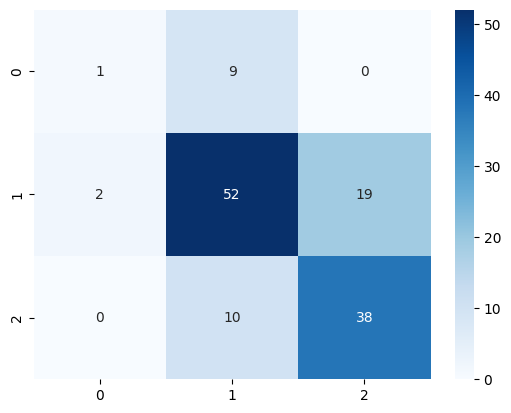

In [733]:
matrix1 = confusion_matrix(Y_test,randfor_predictions)
print(matrix1)
ax1 = sns.heatmap(matrix1, annot=True, cmap='Blues')
print(classification_report(Y_test,randfor_predictions))

In [734]:
# additional alogrithm

In [735]:
# KNN algorithm
knn_classiffier = KNeighborsClassifier(n_neighbors=5)
knn_classiffier.fit(X_train_res, Y_train_res)

KNeighborsClassifier()

In [736]:
knn_prediction = knn_classiffier.predict(X_test)

[[ 4  3  3]
 [31 35  7]
 [19 12 17]]


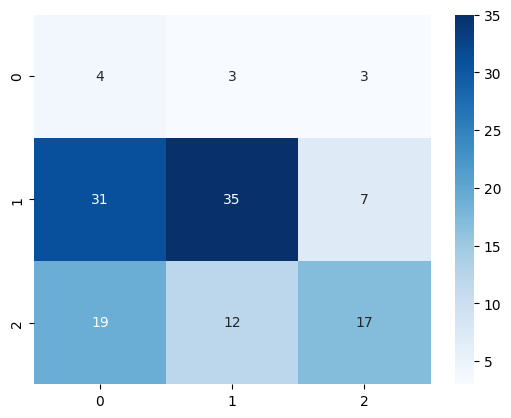

              precision    recall  f1-score   support

           0       0.07      0.40      0.12        10
           1       0.70      0.48      0.57        73
           2       0.63      0.35      0.45        48

    accuracy                           0.43       131
   macro avg       0.47      0.41      0.38       131
weighted avg       0.63      0.43      0.49       131



In [737]:
matrix = confusion_matrix(Y_test, knn_prediction)
print(matrix)

ax2 = sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()
print(classification_report(Y_test, knn_prediction))